In [1]:
import torch
import sys
import numpy as np
sys_path = 'D:/Research_CAE/MyTinyCUDANN/tiny-cuda-nn/main'
sys.path.append(sys_path)
from PDE import Helmholtz_equation
from matplotlib import pyplot as plt
device = "cpu" #torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

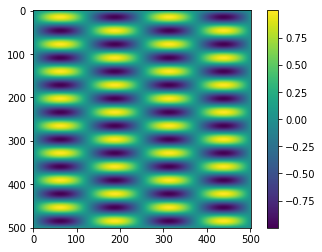

In [32]:
equation = Helmholtz_equation(a1 = 4, a2 = 16)
# generate grid points for [0,1] * [0,1]
field_min = 0
field_max = 1
resolution = 501
x1_list = np.linspace(field_min, field_max, resolution)
x2_list = np.linspace(field_min, field_max, resolution)
X1,X2 = np.meshgrid(x1_list,x2_list)
X_field = torch.tensor(np.concatenate((X1.reshape(-1,1),X2.reshape(-1,1)),axis = 1)).float().to(device)
real_solution = equation.real_solution(X_field)
real_solution = real_solution.reshape(resolution,resolution)
plt.imshow(real_solution)
plt.colorbar()

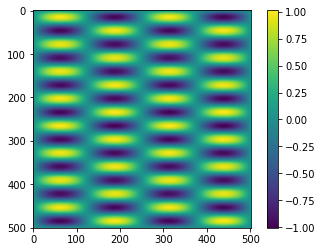

In [34]:
pred = np.loadtxt("Tasks\\GridMLP_decoupled\\config_1\\pred_0.txt")
pred = pred.reshape(501,501)
plt.imshow(pred)
plt.colorbar()

In [35]:
MSE = torch.mean((real_solution - pred)**2)
print(MSE)

tensor(0.0002, dtype=torch.float64)


In [4]:
from gradient import grad2

In [12]:
# X = torch.tensor([[0.4,0.3]], requires_grad=True)
X = torch.rand((10,2),requires_grad=True)
u = equation.real_solution
grad_info = grad2(u,X.shape[0])
residual = equation.strong_form(X,grad_info(X))
residual

tensor([ 0.0000e+00,  0.0000e+00, -1.9073e-06,  2.3842e-07,  0.0000e+00,
        -1.5259e-05,  1.9073e-06,  0.0000e+00,  0.0000e+00,  0.0000e+00],
       grad_fn=<SubBackward0>)